In [1]:
import numpy as np
import networkx as nx
import torch
import matplotlib.pyplot as plt
from experiments.sol_propagator import PDESolutionPropogator
from experiments.visuallization_utils import plot_pde_sols, get_pde_sol
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
G1 = nx.cycle_graph(10)
G1.add_edge(0, 5)

G21 = nx.cycle_graph(5)
G22 = nx.cycle_graph(5)
mapping = {i: i+5 for i in range(5)}
G22 = nx.relabel_nodes(G22, mapping)
G2 = nx.union(G21, G22)
G2.add_edge(0, 5)

G3 = nx.cycle_graph(10)
G3.add_edge(2, 7)

# G3 = G1 # same as G1, different order
# desired_order = [5, 0, 9, 8, 7, 6, 1, 2, 3, 4]
# reordering_mapping = {node: new_label for node, new_label in zip(sorted(G1.nodes()), desired_order)}
# G3 = nx.relabel_nodes(G3, reordering_mapping)

graphs = [G1, G2, G3]

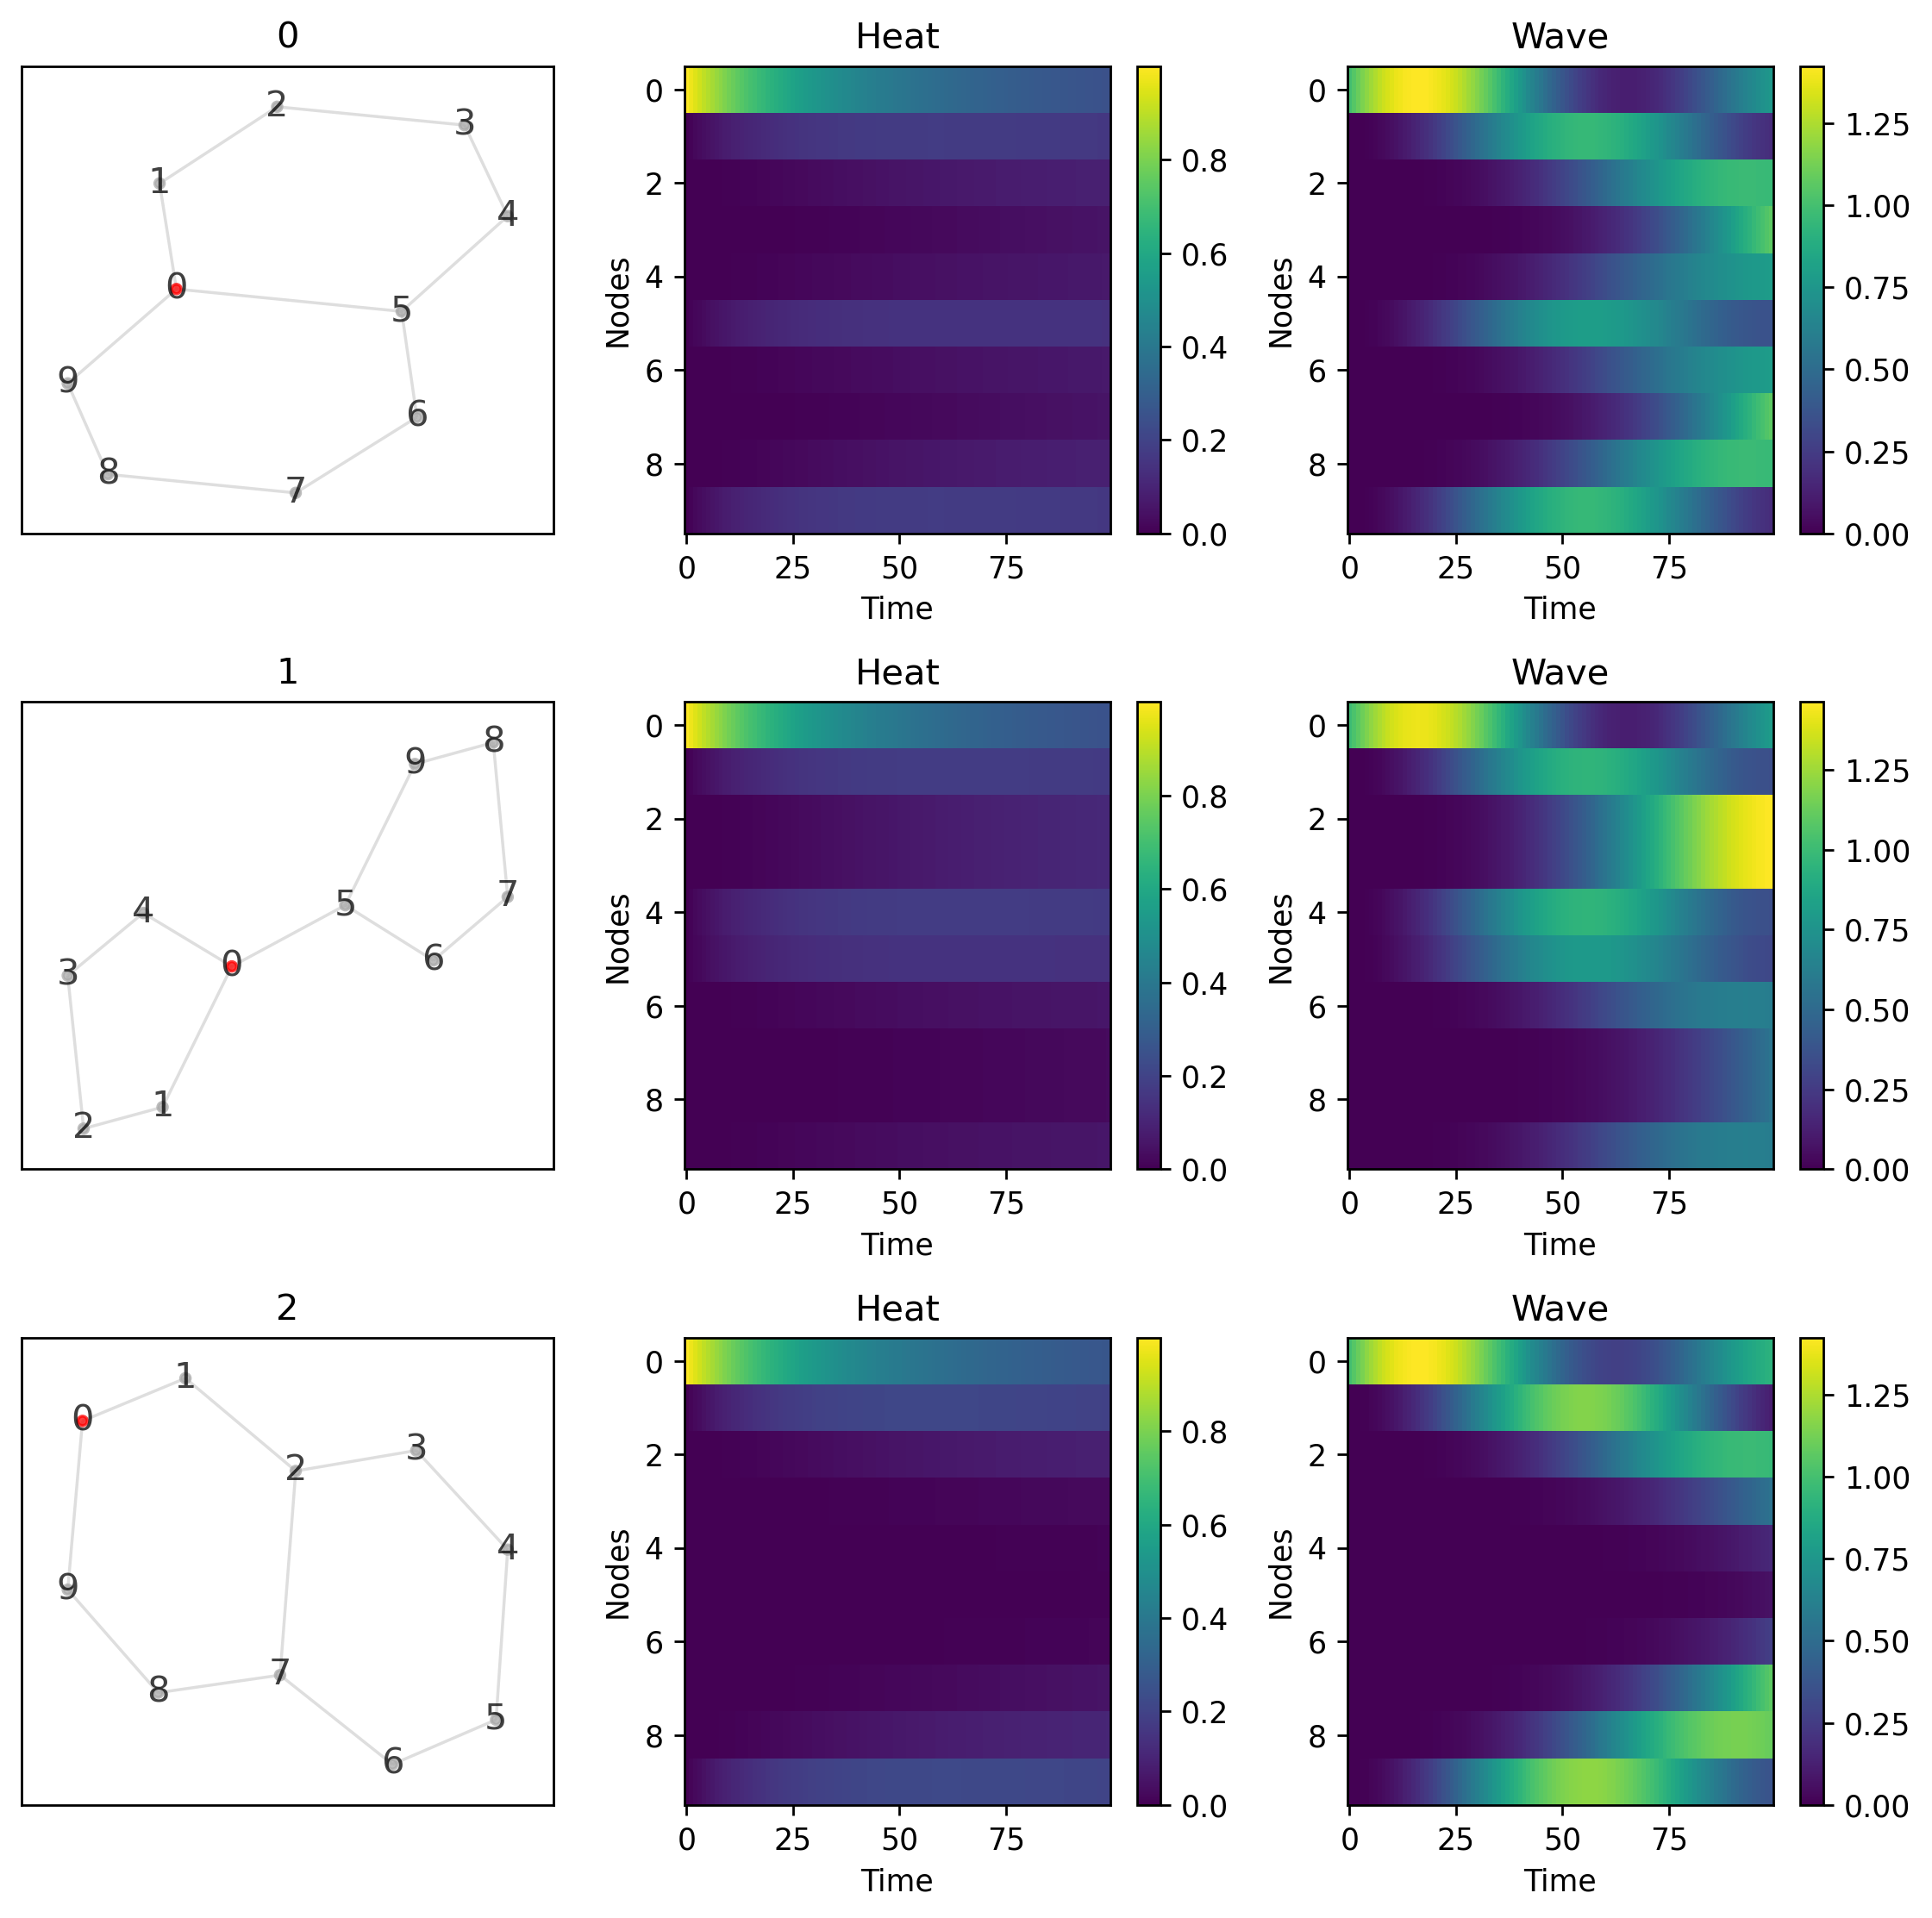

In [3]:
res1 = plot_pde_sols(graphs, device, c=0.5, dirac_ids=[0], display_labels=True)

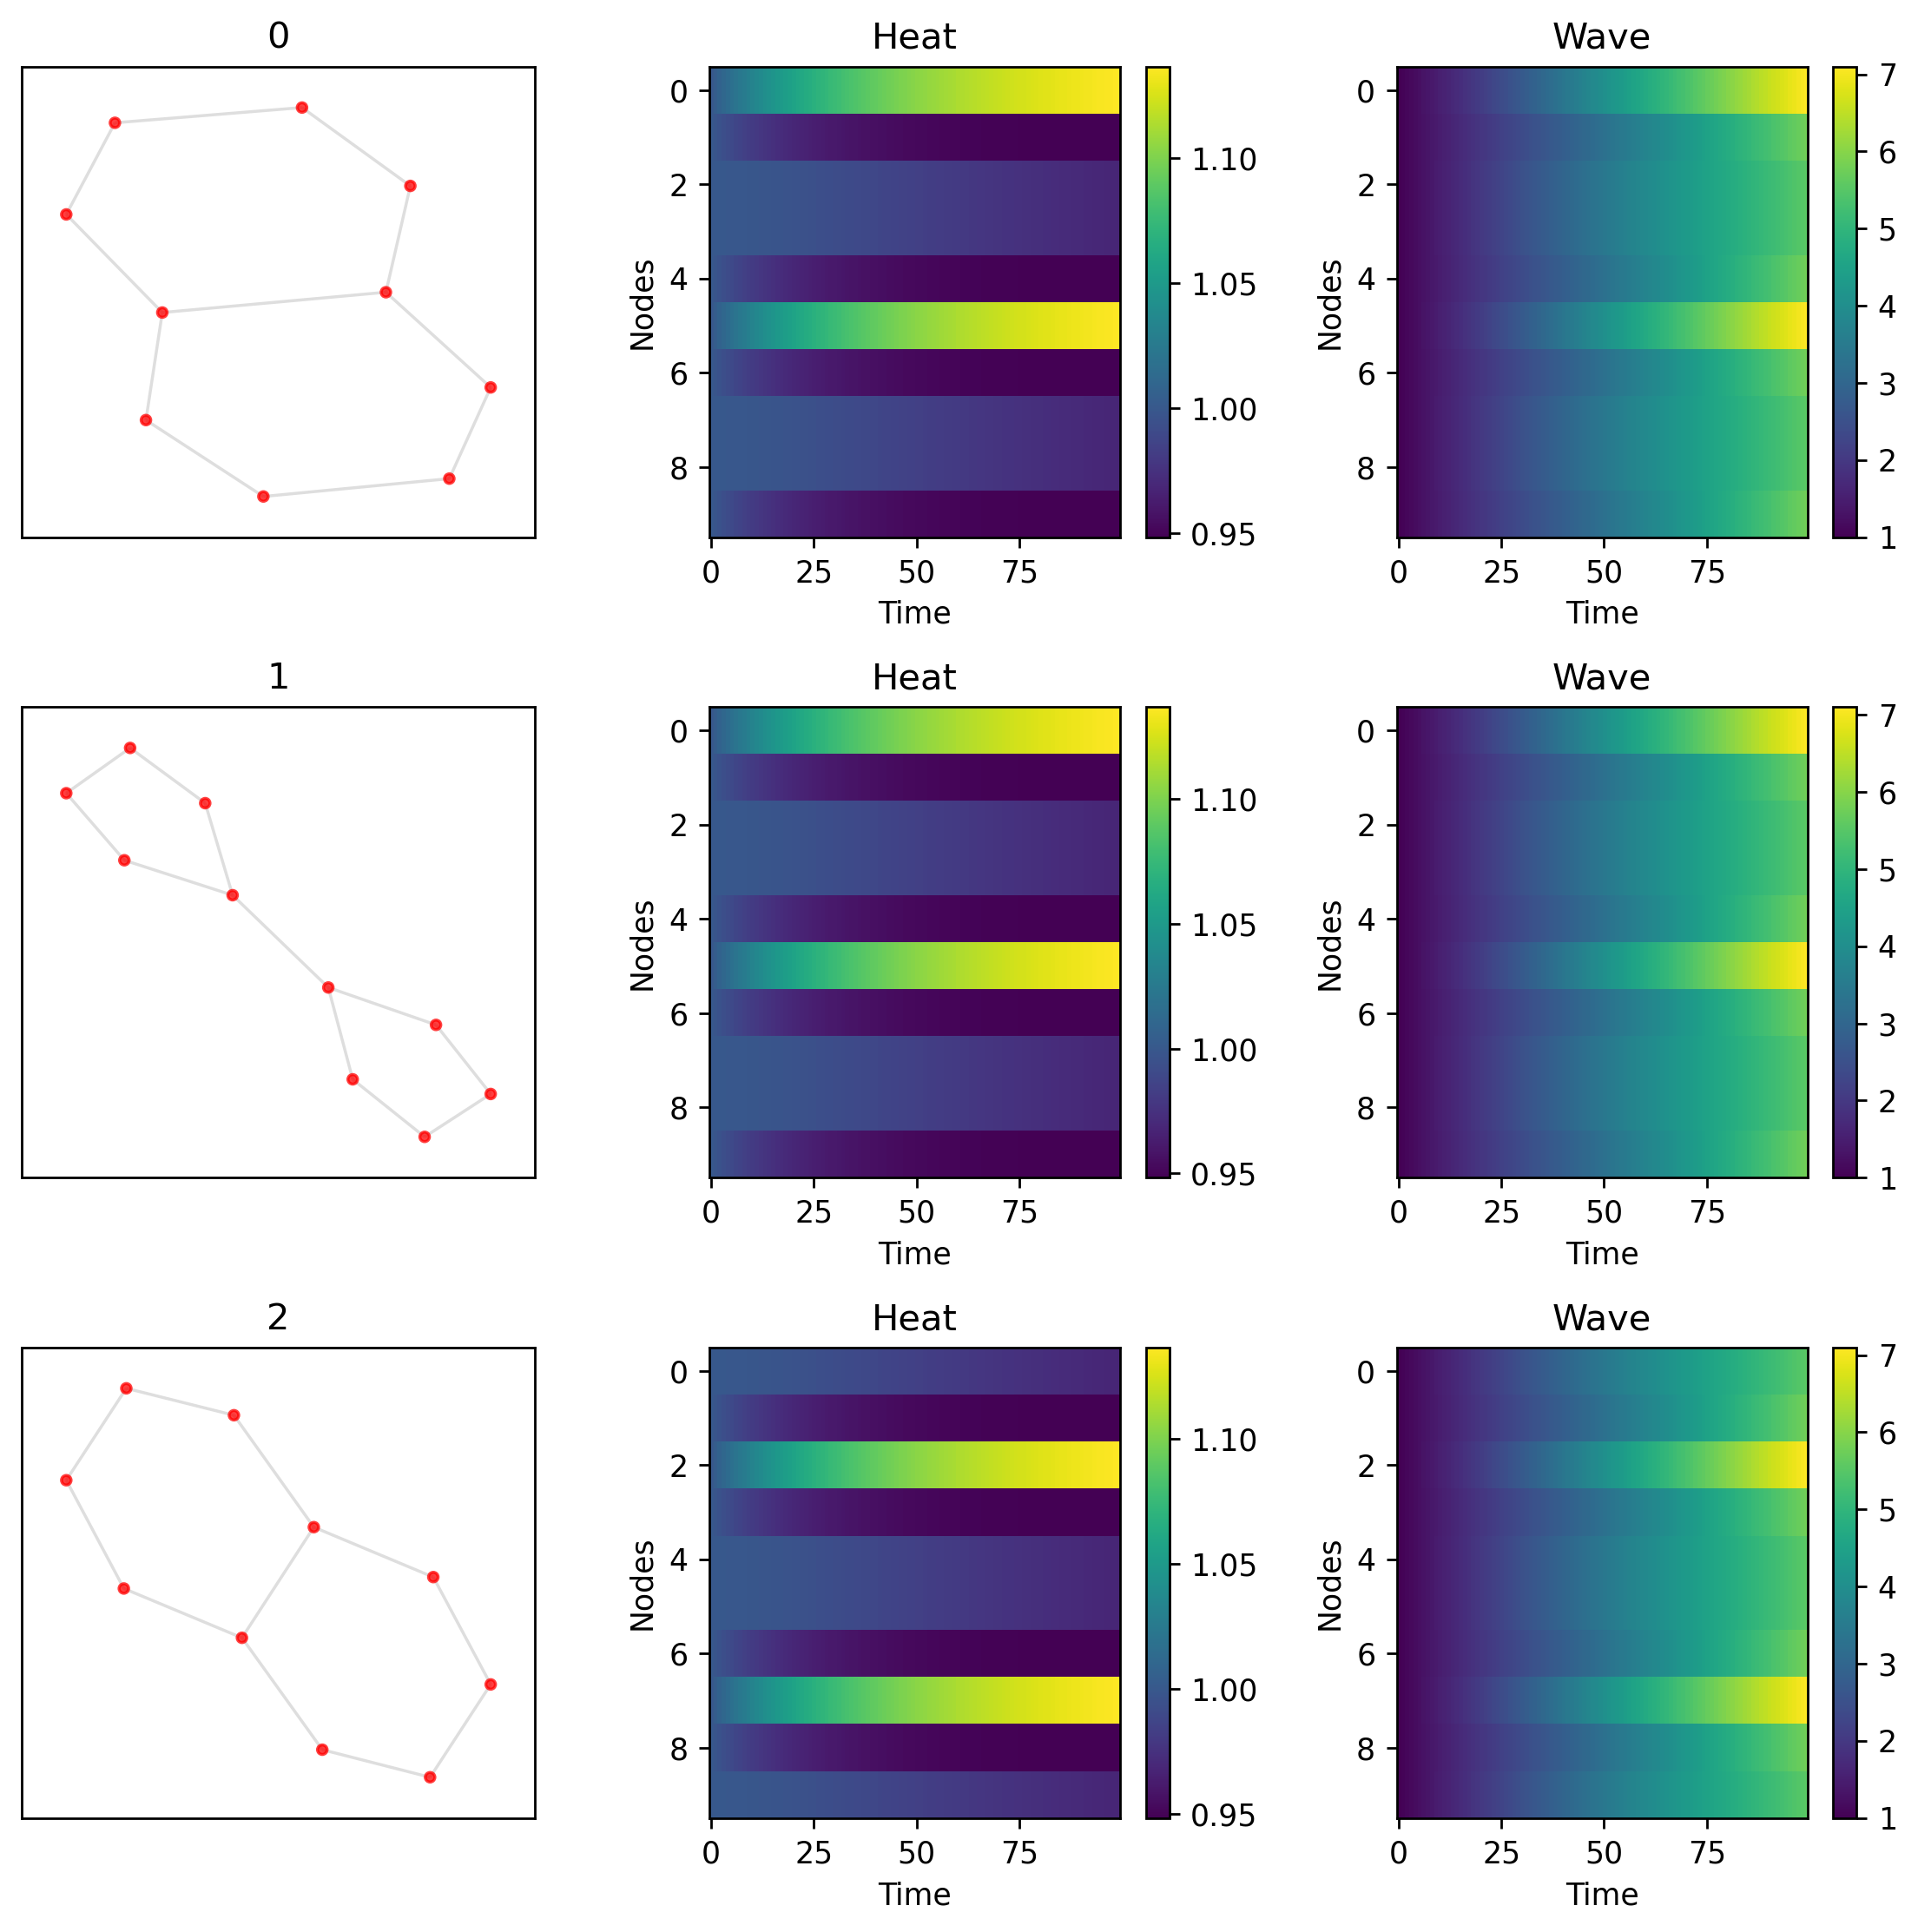

In [4]:
res4 = plot_pde_sols(graphs, device, c=0.5, dirac_ids=[i for i in range(10)])

In [5]:
ts = torch.linspace(0, 10, 100).float().to(device)
yHeats1, yHeats2, yWaves1, yWaves2, yHeats3, yWaves3 = [], [], [], [], [], [] 
for i in range(10):
    yHeat1, yWave1 = get_pde_sol(G1, ts, [i], device)
    yHeat2, yWave2 = get_pde_sol(G2, ts, [i], device)
    yHeat3, yWave3 = get_pde_sol(G3, ts, [i], device)
    yHeats1.append(yHeat1)
    yWaves1.append(yWave1)
    yHeats2.append(yHeat2)
    yWaves2.append(yWave2)
    yHeats3.append(yHeat3)
    yWaves3.append(yWave3)
yHeats1 = np.stack(yHeats1)
yWaves1 = np.stack(yWaves1)
yHeats2 = np.stack(yHeats2)
yWaves2 = np.stack(yWaves2)
yHeats3 = np.stack(yHeats3)
yWaves3 = np.stack(yWaves3)

In [6]:
np.sort(np.linalg.eigvals(yHeats1[..., -1]))[::-1]

array([0.99999946, 0.6203576 , 0.35900304, 0.23666924, 0.17773567,
       0.0379099 , 0.02846983, 0.01876847, 0.01086136, 0.00673793],
      dtype=float32)

In [7]:
np.sort(np.linalg.eigvals(yHeats2[..., -1]))[::-1]

array([1.0000001 , 0.77550566, 0.23666939, 0.17773558, 0.17773546,
       0.10812049, 0.0187685 , 0.01086137, 0.01086136, 0.01000585],
      dtype=float32)

In [8]:
np.sort(np.linalg.eigvals(yHeats3[..., -1]))[::-1]

array([1.0000006 , 0.62035817, 0.35900295, 0.23666939, 0.17773575,
       0.0379099 , 0.02846984, 0.0187685 , 0.01086134, 0.00673792],
      dtype=float32)

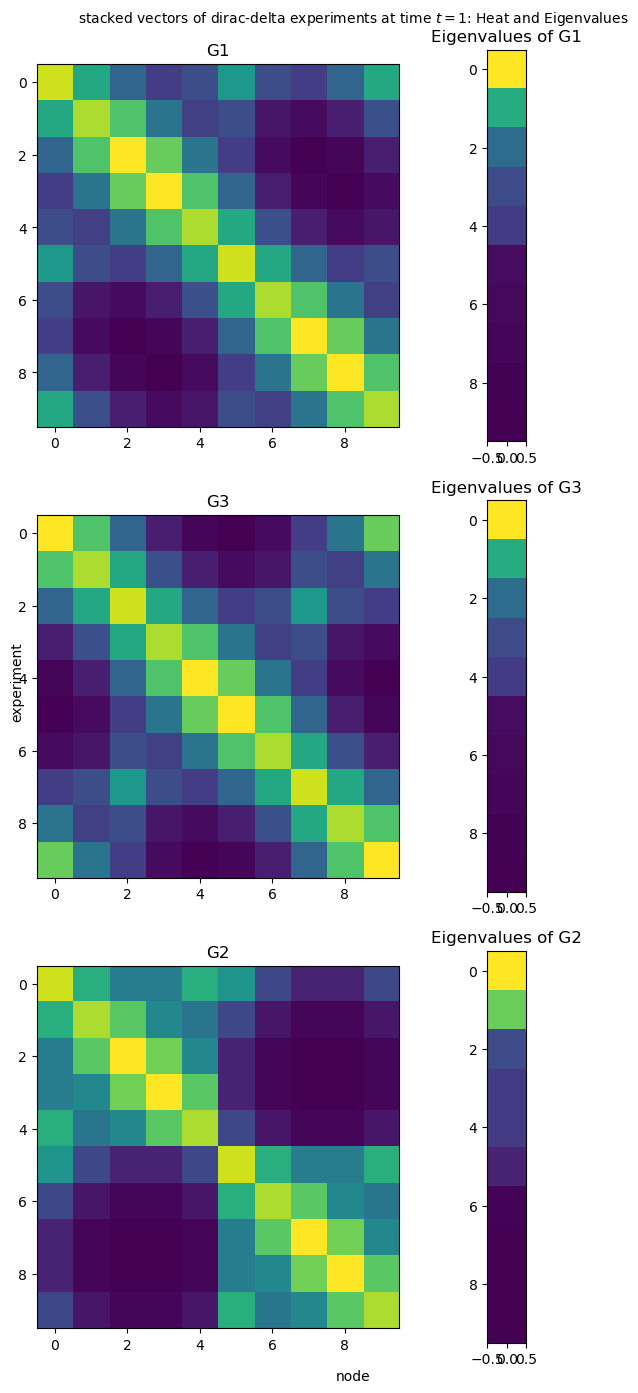

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# create a figure with 3 subplots
fig, axs = plt.subplots(3, 2, figsize=(7, 14))

# plot the first heatmap
axs[0,0].imshow(yHeats1[..., -1])
axs[0,0].set_title('G1')

# plot the first eigenvector
axs[0,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yHeats1[..., -1]))[::-1], axis=-1))
axs[0,1].set_title('Eigenvalues of G1')

# plot the second heatmap
axs[2,0].imshow(yHeats2[..., -1])
axs[2,0].set_title('G2')

# plot the second eigenvector
axs[2,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yHeats2[..., -1]))[::-1], axis=-1))
axs[2,1].set_title('Eigenvalues of G2')

# plot the third heatmap
axs[1,0].imshow(yHeats3[..., -1])
axs[1,0].set_title('G3')

# plot the third eigenvector
axs[1,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yHeats3[..., -1]))[::-1], axis=-1))
axs[1,1].set_title('Eigenvalues of G3')

# add a common x-label and y-label for all subplots
fig.text(0.5, 0.001, 'node', ha='center', fontsize=10)
fig.text(0.01, 0.5, 'experiment', va='center', rotation='vertical', fontsize=10)

# add a title for the whole figure
fig.suptitle('stacked vectors of dirac-delta experiments at time $t = 1$: Heat and Eigenvalues', fontsize=10)

# adjust the spacing between subplots
fig.tight_layout()

# display the figure
plt.show()


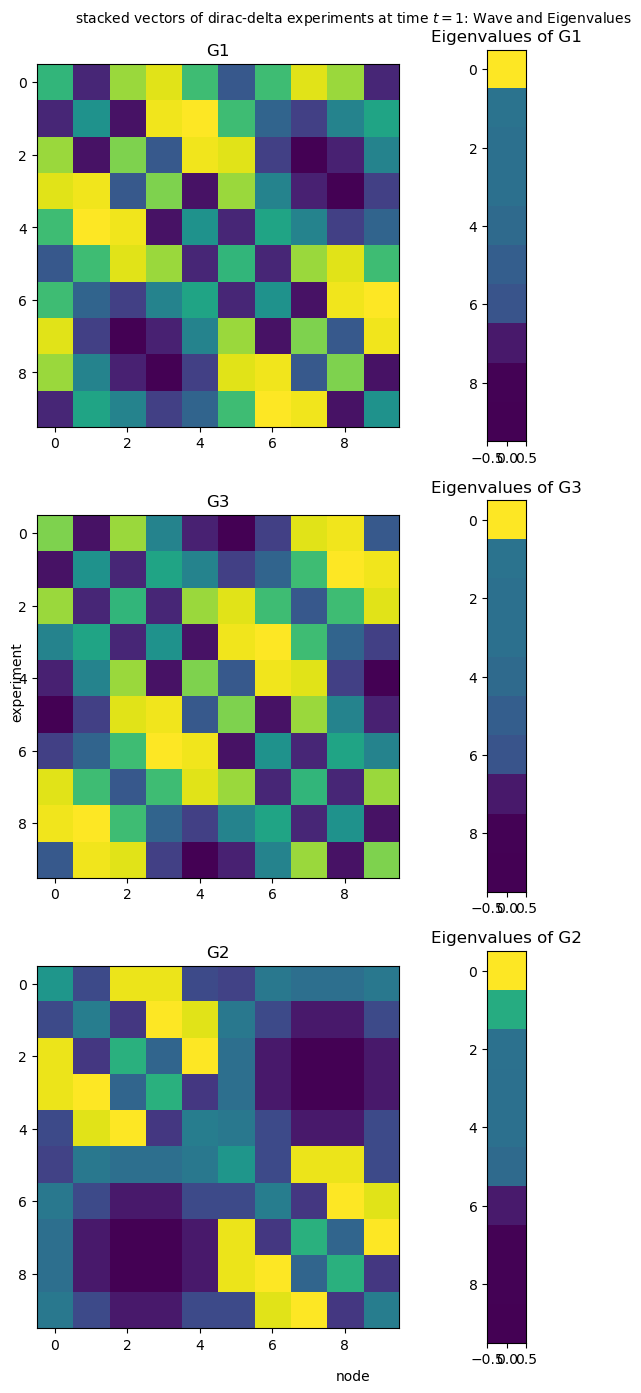

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# create a figure with 3 subplots
fig, axs = plt.subplots(3, 2, figsize=(7, 14))

# plot the first Wavemap
axs[0,0].imshow(yWaves1[..., -1])
axs[0,0].set_title('G1')

# plot the first eigenvector
axs[0,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yWaves1[..., -1]))[::-1], axis=-1))
axs[0,1].set_title('Eigenvalues of G1')

# plot the second Wavemap
axs[2,0].imshow(yWaves2[..., -1])
axs[2,0].set_title('G2')

# plot the second eigenvector
axs[2,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yWaves2[..., -1]))[::-1], axis=-1))
axs[2,1].set_title('Eigenvalues of G2')

# plot the third Wavemap
axs[1,0].imshow(yWaves3[..., -1])
axs[1,0].set_title('G3')

# plot the third eigenvector
axs[1,1].imshow(np.expand_dims(np.sort(np.linalg.eigvals(yWaves3[..., -1]))[::-1], axis=-1))
axs[1,1].set_title('Eigenvalues of G3')

# add a common x-label and y-label for all subplots
fig.text(0.5, 0.001, 'node', ha='center', fontsize=10)
fig.text(0.01, 0.5, 'experiment', va='center', rotation='vertical', fontsize=10)

# add a title for the whole figure
fig.suptitle('stacked vectors of dirac-delta experiments at time $t = 1$: Wave and Eigenvalues', fontsize=10)

# adjust the spacing between subplots
fig.tight_layout()

# display the figure
plt.show()


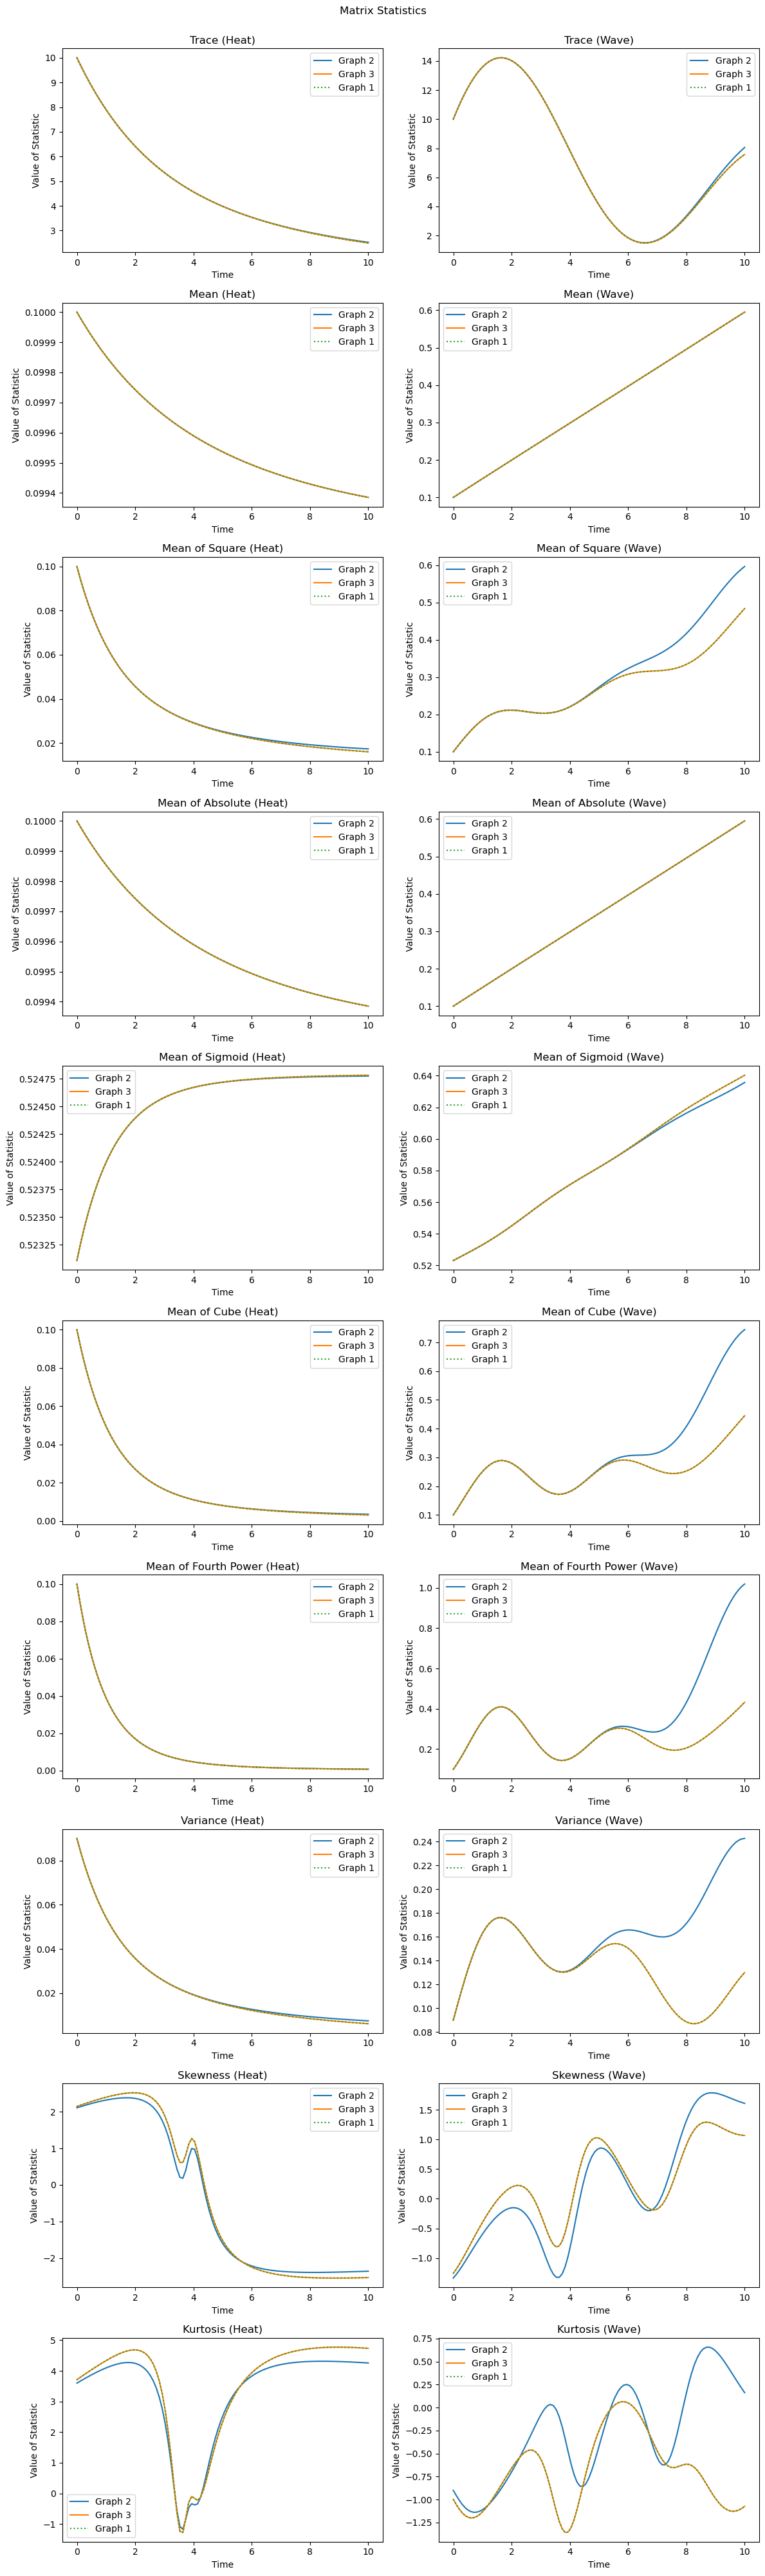

In [17]:
# Define statistics to compute
stats = [('Trace', lambda x: np.trace(x[..., :])), 
         ('Mean', lambda x: np.mean(x, axis=(0,1))), 
         ('Mean of Square', lambda x: np.mean(x**2, axis=(0,1))), 
         ('Mean of Absolute', lambda x: np.mean(np.abs(x), axis=(0,1))), 
         ('Mean of Sigmoid', lambda x: np.mean(1/(1+np.exp(-x)), axis=(0,1))),
         ('Mean of Cube', lambda x: np.mean(x**3, axis=(0,1))), 
         ('Mean of Fourth Power', lambda x: np.mean(x**4, axis=(0,1))),
         ('Variance', lambda x: np.var(x, axis=(0,1))),
         ('Skewness', lambda x: np.mean((x - np.mean(x, axis=-1, keepdims=True))**3, axis=(0,1))/np.mean((x - np.mean(x, axis=-1, keepdims=True))**2, axis=(0,1))**(3/2)),
         ('Kurtosis', lambda x: np.mean((x - np.mean(x, axis=-1, keepdims=True))**4, axis=(0,1))/np.mean((x - np.mean(x, axis=-1, keepdims=True))**2, axis=(0,1))**2 - 3)]

# Create figure and axes
fig, axs = plt.subplots(len(stats), 2, figsize=(12, 40))

# Compute statistics and plot on each subplot
for i, (stat, func) in enumerate(stats):
    # Compute statistics for heat matrices
    yHeats_stats = np.array([func(yHeats1), func(yHeats2), func(yHeats3)])
    
    # Compute statistics for wave matrices
    yWaves_stats = np.array([func(yWaves1), func(yWaves2), func(yWaves3)])
    
    # Plot data on each subplot
    axs[i][0].plot(ts, yHeats_stats[1], label='Graph 2')
    axs[i][0].plot(ts, yHeats_stats[2], label='Graph 3')
    axs[i][0].plot(ts, yHeats_stats[0], label='Graph 1', linestyle='dotted')
    axs[i][0].set_title(stat + ' (Heat)')
    axs[i][0].set_xlabel('Time')
    axs[i][0].set_ylabel('Value of Statistic')
    axs[i][0].legend()
    
    axs[i][1].plot(ts, yWaves_stats[1], label='Graph 2')
    axs[i][1].plot(ts, yWaves_stats[2], label='Graph 3')
    axs[i][1].plot(ts, yWaves_stats[0], label='Graph 1', linestyle='dotted')
    axs[i][1].set_title(stat + ' (Wave)')
    axs[i][1].set_xlabel('Time')
    axs[i][1].set_ylabel('Value of Statistic')
    axs[i][1].legend()

# Set overall title for the figure
fig.suptitle('Matrix Statistics', y=1.)
fig.tight_layout()
# Show the plot
plt.show()